In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [106]:
df=pd.read_csv('student_scores.csv')
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [108]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [66]:
print('Rows:', df.shape[0])
print('Columns:', df.shape[1])
df.shape

Rows: 30641
Columns: 15


(30641, 15)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [70]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [72]:
# drop Unnamed column
df=df.drop(columns=['Unnamed: 0'])

#alernate way
# df=df.drop('Unnamed: 0', axis=1)

print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


In [74]:
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [76]:
df["WklyStudyHours"].value_counts()

WklyStudyHours
5 - 10    16246
< 5        8238
> 10       5202
Name: count, dtype: int64

### change weekly study hours column 

In [78]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","5-10")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


 ### gender distribution

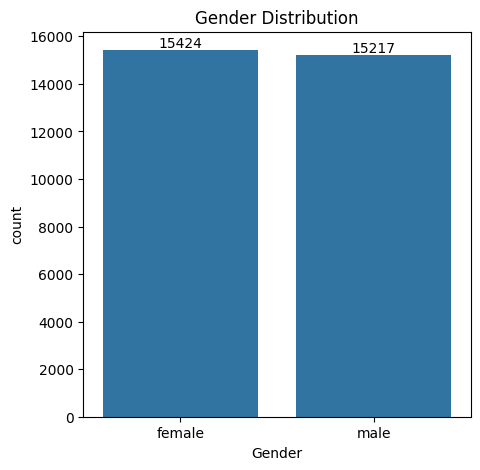

In [80]:
plt.figure(figsize=(5,5))
ax= sns.countplot( x="Gender", data=df)
ax.bar_label(ax.containers[0])
plt.title("Gender Distribution")
plt.show()

- We analysed that females are more.

In [82]:
gb=df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


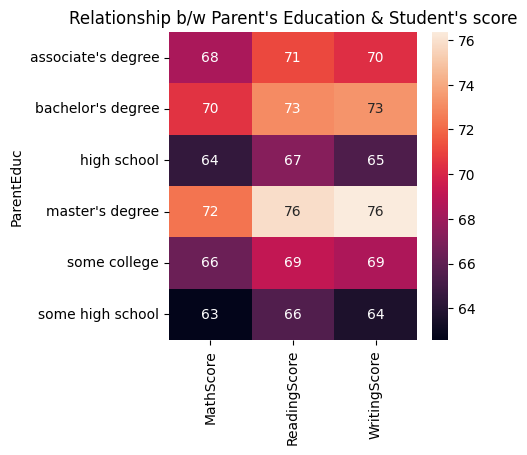

In [84]:
plt.figure(figsize=(4,4))
sns.heatmap(gb, annot=True)  # annot=True to display values in box
plt.title("Relationship b/w Parent's Education & Student's score")
plt.show()

- chart above reflects that parent's education have a good impact onn their scores

In [86]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore":"mean", "WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


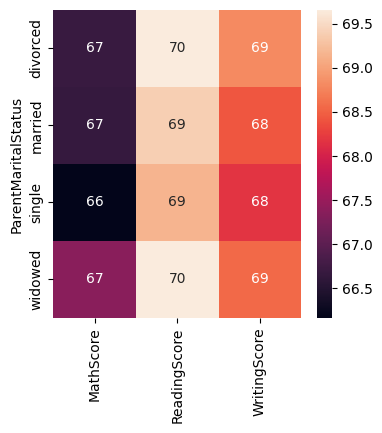

In [88]:
plt.figure(figsize=(4,4))
sns.heatmap(gb1, annot=True)  # annot=True to display values in box
plt.show()

- chart above reflects that parent's marital staus has negligible impact onn their scores

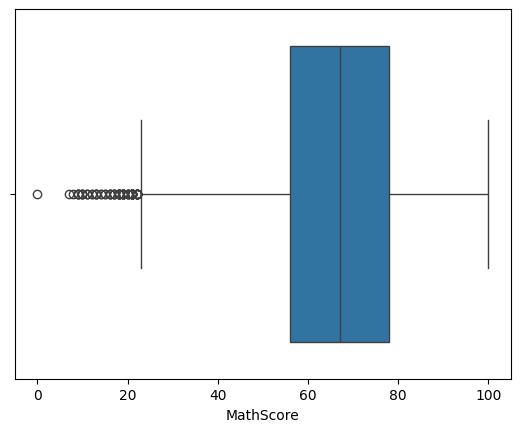

In [90]:
sns.boxplot(x="MathScore", data=df)
plt.show()

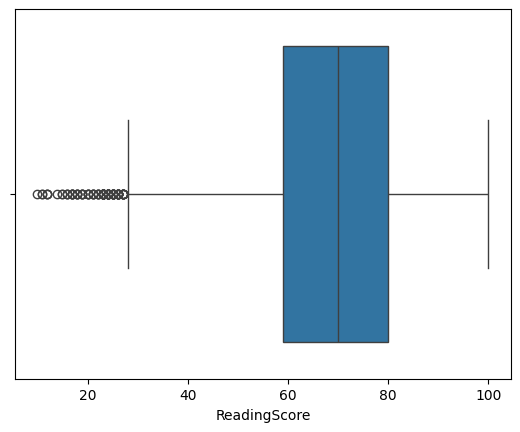

In [92]:
sns.boxplot(x="ReadingScore", data=df)
plt.show()

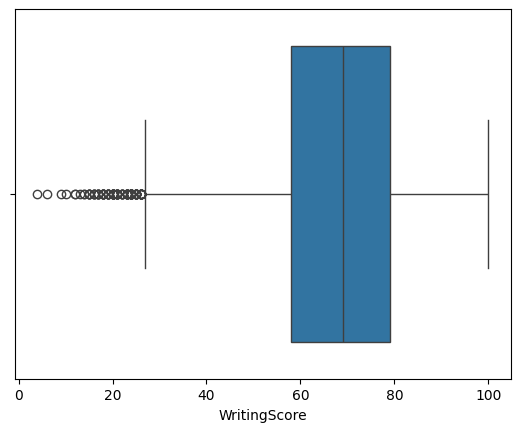

In [94]:
sns.boxplot(x="WritingScore", data=df)
plt.show()

In [96]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


### Distribution of Ethnnic Groups

[2219, 5826, 9212, 7503, 4041]


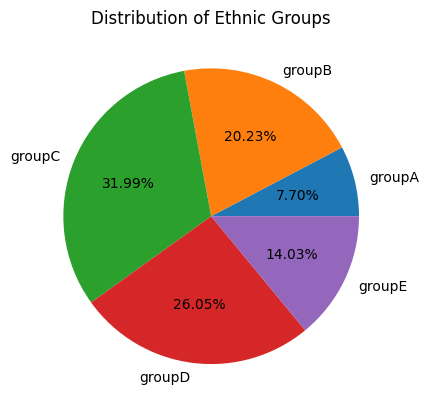

In [98]:
groupA=df.loc[(df["EthnicGroup"]=="group A")].count()
groupB=df.loc[(df["EthnicGroup"]=="group B")].count()
groupC=df.loc[(df["EthnicGroup"]=="group C")].count()
groupD=df.loc[(df["EthnicGroup"]=="group D")].count()
groupE=df.loc[(df["EthnicGroup"]=="group E")].count()

l=["groupA", "groupB", "groupC", "groupD", "groupE"]
mlist=[groupA["EthnicGroup"], groupB["EthnicGroup"], groupC["EthnicGroup"], groupD["EthnicGroup"], groupE["EthnicGroup"]]

# print(mlist)
output_list = [int(x) for x in mlist]
print(output_list)

plt.pie(mlist, labels=l, autopct="%1.2f%%")    # autopct adds the percentage 
plt.title("Distribution of Ethnic Groups")
plt.show()

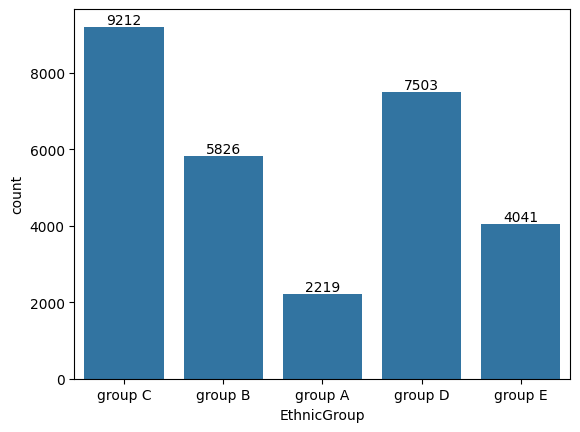

In [100]:
ax= sns.countplot(x="EthnicGroup", data=df)
ax.bar_label(ax.containers[0])
plt.show()

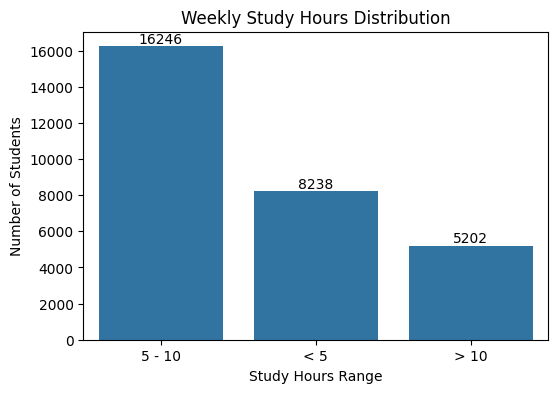

In [114]:
# Weekly Study Hours Distribution Chart
study_hours_counts = df["WklyStudyHours"].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=study_hours_counts.index, y=study_hours_counts.values)
ax.bar_label(ax.containers[0])  # Add labels to bars
plt.title("Weekly Study Hours Distribution")
plt.xlabel("Study Hours Range")
plt.ylabel("Number of Students")
plt.show()


### Summary

1. Gender Distribution
The dataset shows that females are more prevalent than males among the students.
2. Parent's Education and Student's Scores
Students whose parents have higher education levels, such as a master's degree or a bachelor's degree, tend to score higher across all subjects (Math, Reading, Writing).
Master's degree parents: Highest scores (Math: 72.33, Reading: 75.83, Writing: 76.36).
Some high school parents: Lowest scores (Math: 62.58, Reading: 65.51, Writing: 63.63).
Impact: Parent’s education has a significant positive influence on student performance.
3. Parent's Marital Status and Student's Scores
The marital status of parents has a negligible impact on student scores:
Scores are relatively consistent across all groups (divorced, married, single, widowed).
Slightly higher scores are observed for children of widowed parents in Math (67.37).
4. Boxplots of Scores
Math Scores:
Most students score between 56 and 78 (25th to 75th percentile).
Some outliers exist at both low and high extremes.
Reading Scores:
Scores are slightly higher than Math, with the majority between 59 and 80.
Fewer low-end outliers compared to Math.
Writing Scores:
Scores are similar to Reading, with the majority between 58 and 79.
Writing has slightly higher scores than Math.
5. Weekly Study Hours
Distribution:
5–10 hours is the most common study range (16,246 students).
<5 hours is the second most common (8,238 students).
>10 hours is the least common (5,202 students).
Observation: Most students study between 5–10 hours weekly, potentially reflecting moderate effort.
6. Ethnic Group Distribution
Distribution of students across ethnic groups:
Group C has the highest representation (30.08%).
Group A has the lowest representation (7.24%).
The distribution reflects a diverse student population with Group C dominating.
7. Impact of Ethnic Group
A count plot and pie chart show that Group C dominates the dataset, with Groups B and D following.
